# MLP

## Imports

In [44]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence

## Load

In [45]:
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



# Preencher valores ausentes com uma string vazia
df_train['seq'] = df_train['seq'].fillna('')
df_test['seq'] = df_test['seq'].fillna('')

# Continuar com o código de pré-processamento
X_train = df_train['seq'].values
y_train = df_train['sentiment'].values

X_test = df_test['seq'].values
y_test = df_test['sentiment'].values

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)



Loading data...
X_train shape: (110847, 500)
y_train shape: (110847,)
X_test shape: (47506, 500)
y_test shape: (47506,)


## Define model

In [46]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 322,179
Trainable params: 322,179
Non-trainable params: 0
_________________________________________________________________


In [47]:
num_classes = 3  # Número de classes (positive, negative, neutral)

# Mapear os rótulos de string para valores inteiros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Converter os rótulos para o formato one-hot
y_train = to_categorical(y_train_encoded, num_classes)
y_test = to_categorical(y_test_encoded, num_classes)


In [48]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
693/693 [==============================] - 40s 57ms/step - loss: 1.0453 - acc: 0.4705 - val_loss: 1.0259 - val_acc: 0.5063
Epoch 2/10
693/693 [==============================] - 40s 57ms/step - loss: 0.9884 - acc: 0.5271 - val_loss: 1.0213 - val_acc: 0.5063
Epoch 3/10
693/693 [==============================] - 40s 57ms/step - loss: 0.9462 - acc: 0.5556 - val_loss: 1.0321 - val_acc: 0.5035
Epoch 4/10
693/693 [==============================] - 40s 58ms/step - loss: 0.8952 - acc: 0.5918 - val_loss: 1.0708 - val_acc: 0.4801
Epoch 5/10
693/693 [==============================] - 40s 58ms/step - loss: 0.8471 - acc: 0.6237 - val_loss: 1.1089 - val_acc: 0.4719
Epoch 6/10
693/693 [==============================] - 40s 58ms/step - loss: 0.7981 - acc: 0.6551 - val_loss: 1.1682 - val_acc: 0.4605
Epoch 7/10
693/693 [==============================] - 40s 58ms/step - loss: 0.7551 - acc: 0.6786 - val_loss: 1.1852 - val_acc: 0.4495
Epoch 8/10
693/693 [==============================] - 43s 61ms

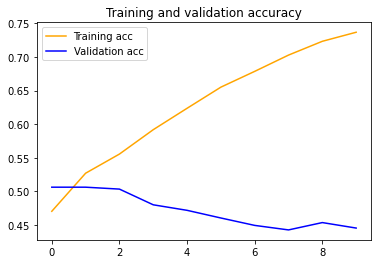

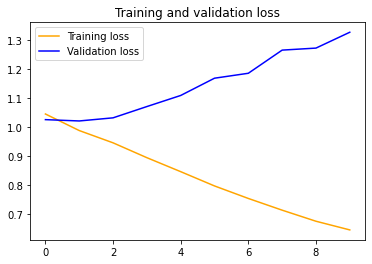

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
results = model.evaluate(X_test, y_test, verbose = 0)
print(results)

[1.3164677619934082, 0.44891172647476196]


In [52]:
model2 = Sequential()
model2.add(Embedding(max_features, 32))
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32, return_sequences = True))
model2.add(SimpleRNN(32))
model2.add(Dense(3, activation='sigmoid'))
model2.summary()

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history2 = model2.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 326,339
Trainable params: 326,339
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
693/693 [============================

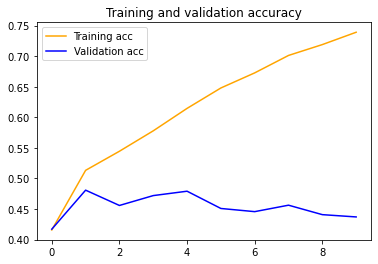

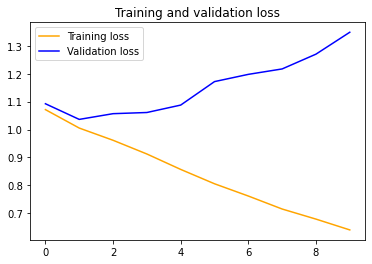

In [54]:
import matplotlib.pyplot as plt

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
model3 = Sequential()
model3.add(Embedding(max_features, 32))
model3.add(SimpleRNN(32))
model3.add(Dense(3, activation='sigmoid'))
model3.summary()


model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history3 = model3.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 322,179
Trainable params: 322,179
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
693/693 [==============================] - 39s 55ms/step - loss: 1.0444 - acc: 0.4740 - val_loss: 1.0600 - val_acc: 0.4425
Epoch 2/10
693/693 [==============================] - 37s 54ms/step - loss: 0.9918 - acc: 0.5199 - val_loss: 1.0411 - val_acc: 0.4829
Epoch 3/10
693/693 [========================

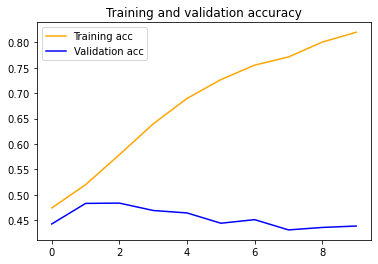

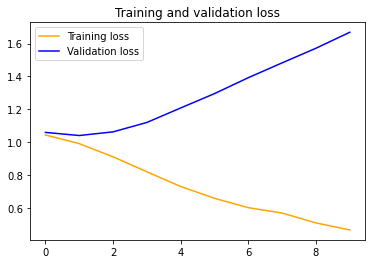

In [58]:
import matplotlib.pyplot as plt

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
